In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
PSf_10_30_RT_1_1 = pd.read_csv('Data/10% 30min RT - 1 - 1_07262023_150228.csv')
PSf_10_30_RT_1_2 = pd.read_csv('Data/10% 30min RT - 1 - 2_07262023_150823.csv')
PSf_10_30_RT_1_3 = pd.read_csv('Data/10% 30min RT - 1 - 3_07262023_151144.csv')
PSf_15_30_RT_1_1 = pd.read_csv('Data/15% 30min RT - 1 - 1_07262023_144613.csv')
PSf_15_30_RT_1_2 = pd.read_csv('Data/15% 30min RT - 1 - 2_07262023_145224.csv')
PSf_15_30_RT_1_3 = pd.read_csv('Data/15% 30min RT - 1 - 3_07262023_145717.csv')
# put these into a list
data_list = [PSf_10_30_RT_1_1, PSf_10_30_RT_1_2, PSf_10_30_RT_1_3, PSf_15_30_RT_1_1, PSf_15_30_RT_1_2, PSf_15_30_RT_1_3]

In [102]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

C:\Users\wang9\AppData\Local\Temp\ipykernel_5048\613202956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (in)'] = data['S:LVDT (in)'] - data['S:LVDT (in)'].iloc[0]


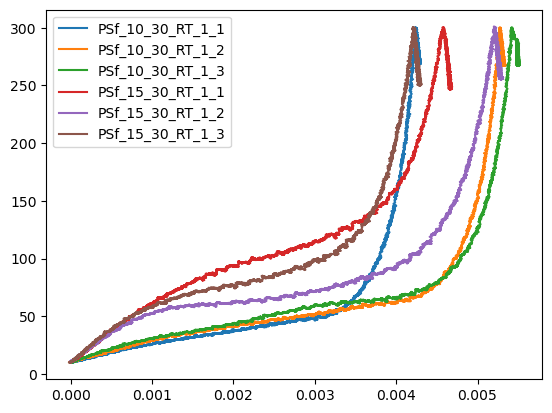

In [103]:
# Plot these in the same graph to compare them
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (in)'] = data['S:LVDT (in)'] - data['S:LVDT (in)'].iloc[0]
    plt.plot(data['S:LVDT (in)'], data['Ch:Load (N)'], label=data_name)
plt.legend(loc='upper left')
plt.show()

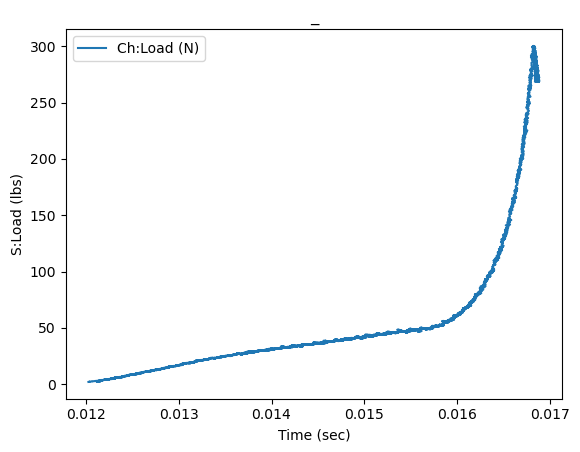

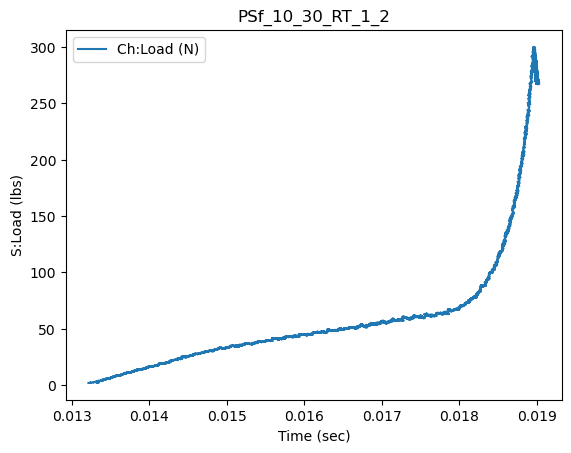

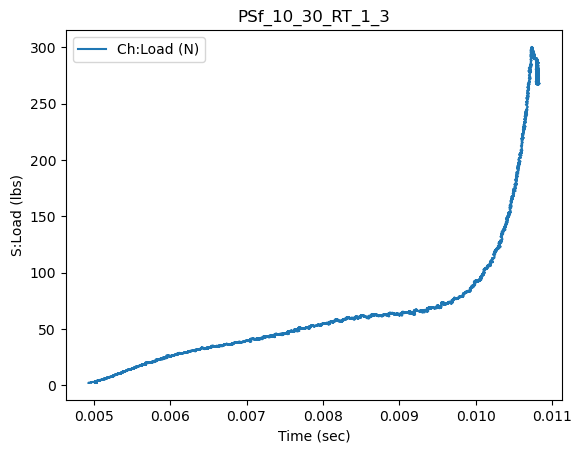

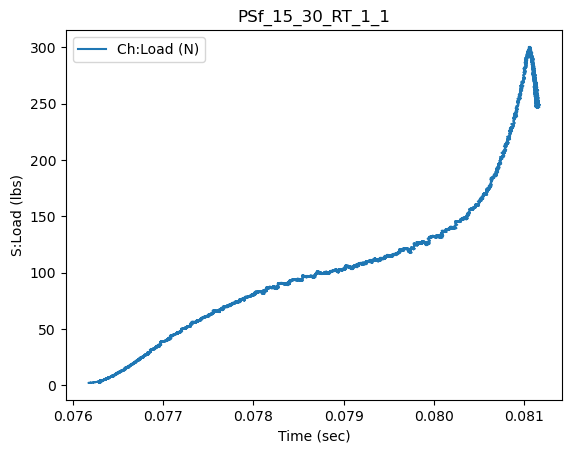

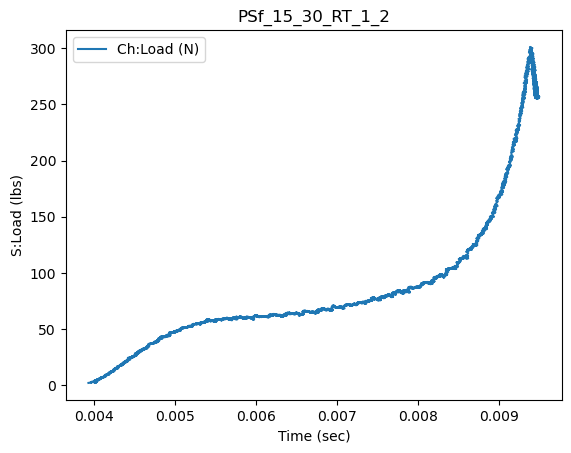

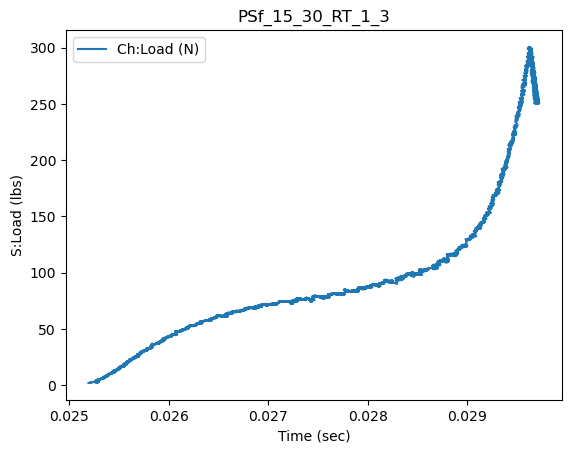

In [34]:
for data in data_list:
    data[data['Ch:Load (N)'] > 2].plot(x='S:LVDT (in)', y='Ch:Load (N)')
    # show title
    plt.title(namestr(data, globals()))
    # show x-axis label
    plt.xlabel(data.columns[0])
    # show y-axis label
    plt.ylabel(data.columns[1])
    plt.show()

# I-18

In [96]:
I18_1_1 = pd.read_csv('Data/I-18_1_1_07282023_141413.csv')
I18_1_2 = pd.read_csv('Data/I-18_1_2_07282023_141649.csv')
I18_1_3 = pd.read_csv('Data/I-18_1_3_07282023_141913.csv')
I18_1_4 = pd.read_csv('Data/I-18_1_4_07282023_142145.csv')
I18_1_5 = pd.read_csv('Data/I-18_1_5_07282023_142425.csv')
data_list = [I18_1_1, I18_1_2, I18_1_3, I18_1_4, I18_1_5]

C:\Users\wang9\AppData\Local\Temp\ipykernel_5048\613202956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (in)'] = data['S:LVDT (in)'] - data['S:LVDT (in)'].iloc[0]


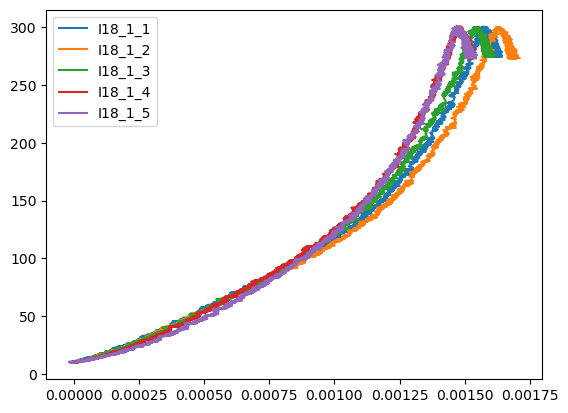

In [100]:
# Plot these in the same graph to compare them
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (in)'] = data['S:LVDT (in)'] - data['S:LVDT (in)'].iloc[0]
    plt.plot(data['S:LVDT (in)'], data['Ch:Load (N)'], label=data_name)
plt.legend(loc='upper left')
plt.show()